### Classifying Dog and Cat using CNN

The **Dog Vs Cat** image classification dataset consists of 8005 images belonging to 2 classes for training images and 2023 images belonging to 2 classes for testing images


1.   Class I = Dog
2.   Class II= Cat

![alt text](https://imgur.com/d8Qd1hD.gif)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


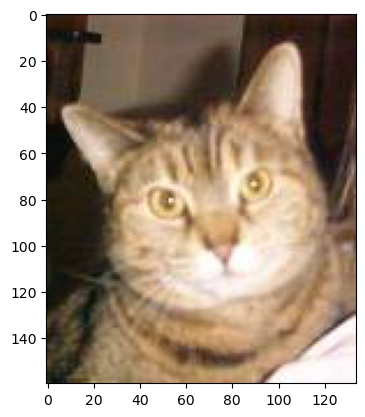

In [4]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('/Users/sharvarisoparkar/Desktop/Deep_learning_folder/Practical5/training_set/training_set/cats/cat.4000.jpg')
imgplot = plt.imshow(img)
plt.show()

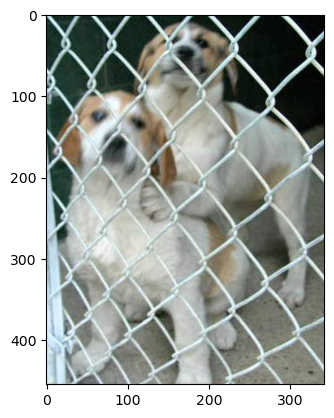

In [6]:
img=mpimg.imread('/Users/sharvarisoparkar/Desktop/Deep_learning_folder/Practical5/test_set/test_set/dogs/dog.4008.jpg')
imgplot = plt.imshow(img)
plt.show()


In [7]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [8]:
print(tensorflow.__version__)

2.15.0


In [9]:
img_width, img_height = 150,150  #width and height of the images
train_data_dir = r"/Users/sharvarisoparkar/Desktop/Deep_learning_folder/Practical5/training_set/training_set"
validation_data_dir=r"/Users/sharvarisoparkar/Desktop/Deep_learning_folder/Practical5/test_set/test_set"
nb_train_sample =100
nb_validation_samples =100
epochs =20
batch_size= 20

In [10]:
import tensorflow.keras.backend as k
if k.image_data_format()=='channels_first':
    input_shape=(3, img_width, img_height)
else:
    input_shape=(img_width,img_height,3)

In [12]:
train_datagen=ImageDataGenerator ( rescale=1. /255,shear_range =0.2,zoom_range=0.2,horizontal_flip =True)
test_datagen=ImageDataGenerator (rescale=1. /255)
train_generator =train_datagen.flow_from_directory(train_data_dir,target_size =(img_width,img_height), batch_size=batch_size,class_mode='binary',classes=['cats','dogs'])
#Now this, will generate training generator data
#Target_size = mentioned image_width and image_height
#Batch_size = 20 (already mentioned)
#Class_mode = binary(because here only two classes are there to classify)
validation_generator =test_datagen.flow_from_directory(validation_data_dir,target_size =(img_width,img_height), batch_size=batch_size,class_mode='binary')
#Now, this will generate testing generator data
#Target_size = mentioned image_width and image_height
#Batch_size = 20 (already mentioned)
#Class_mode = binary(because here only two classes are there to classify)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


##### Visual Representation of ImageDataGenerator

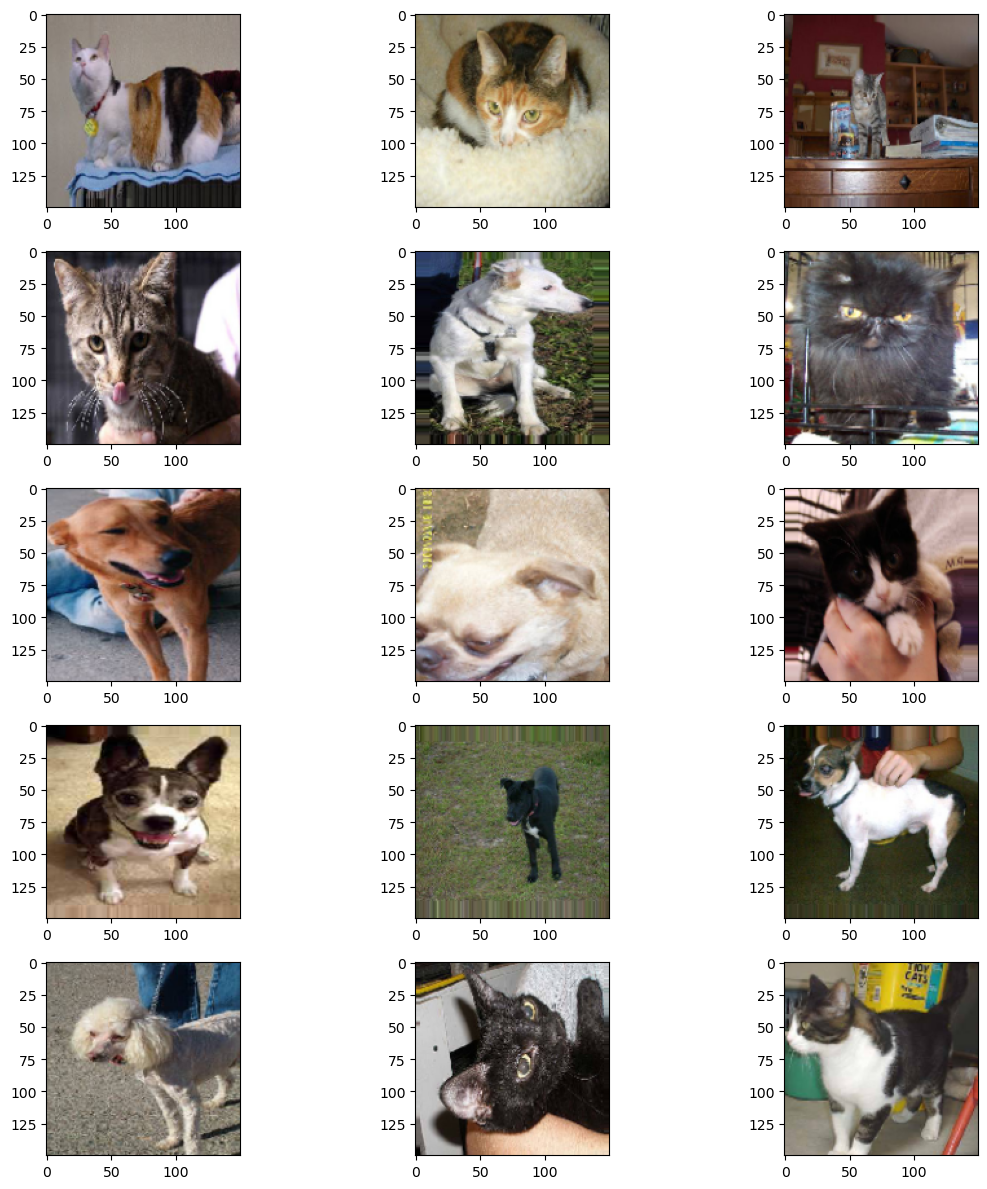

In [14]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in train_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

 ## Build the basic CNN model 0

<b>

1.   Conlutional Layer
2.   ReLu
3. Pooling Layer
4. Fully Connected Layer (Dense)


![alt text](https://i.imgur.com/P4yvxRW.png)

In [15]:
model = Sequential()
model.add(Conv2D(64,(3,3),input_shape=input_shape)) #64 neurons with 3*3 filter
#This class allows to create convolutional neural network to extract feature from the images

model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))#MaxPooling2D helps to reduce the size of the data

model.add(Flatten())#Converts multi dimensional array to 1D channel
model.add(Dense(64)) #64 neurons with 3*3 filter
#Numbers of output nodes in the hidden layer
model.add(Activation('relu'))
model.add(Dense(1)) #output layer
model.add(Activation('sigmoid')) #sigmoid activation function
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 activation (Activation)     (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 350464)            0         
                                                                 
 dense (Dense)               (None, 64)                22429760  
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                        

###### Compile the basic CNN model

In [16]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 activation (Activation)     (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 350464)            0         
                                                                 
 dense (Dense)               (None, 64)                22429760  
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                        

In [17]:
training = model.fit_generator(train_generator,
                   steps_per_epoch=nb_train_sample,epochs=epochs,
                   validation_data=validation_generator,
                   validation_steps=nb_validation_samples)

/var/folders/_2/bhvs0hg507b193s64c1g1lhr0000gp/T/ipykernel_18713/3770263769.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  training = model.fit_generator(train_generator,


Epoch 1/20
100/100 [==============================] - 34s 329ms/step - loss: 1.8711 - accuracy: 0.5647 - val_loss: 0.7467 - val_accuracy: 0.5435
Epoch 2/20
100/100 [==============================] - 31s 307ms/step - loss: 0.6918 - accuracy: 0.5990 - val_loss: 0.6219 - val_accuracy: 0.6645
Epoch 3/20
100/100 [==============================] - 33s 329ms/step - loss: 0.6592 - accuracy: 0.6470 - val_loss: 0.6429 - val_accuracy: 0.6650
Epoch 4/20
100/100 [==============================] - 31s 312ms/step - loss: 0.6493 - accuracy: 0.6605 - val_loss: 0.6273 - val_accuracy: 0.6445
Epoch 5/20
100/100 [==============================] - 28s 283ms/step - loss: 0.6475 - accuracy: 0.6589 - val_loss: 0.6396 - val_accuracy: 0.6635
Epoch 6/20
100/100 [==============================] - 29s 286ms/step - loss: 0.6429 - accuracy: 0.6610 - val_loss: 0.5886 - val_accuracy: 0.7035
Epoch 7/20
100/100 [==============================] - 28s 283ms/step - loss: 0.6109 - accuracy: 0.6776 - val_loss: 0.5716 - val_ac

##### Find the accuracy score

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


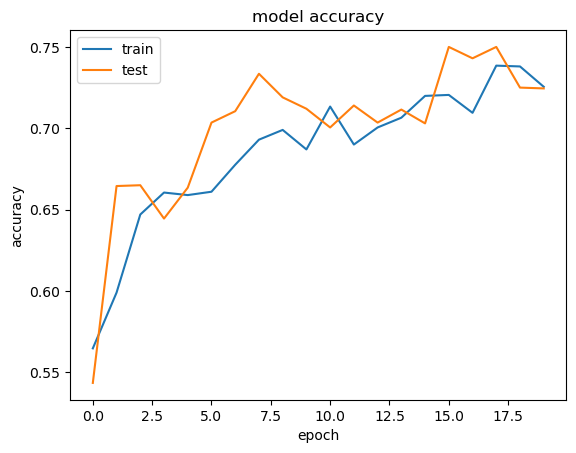

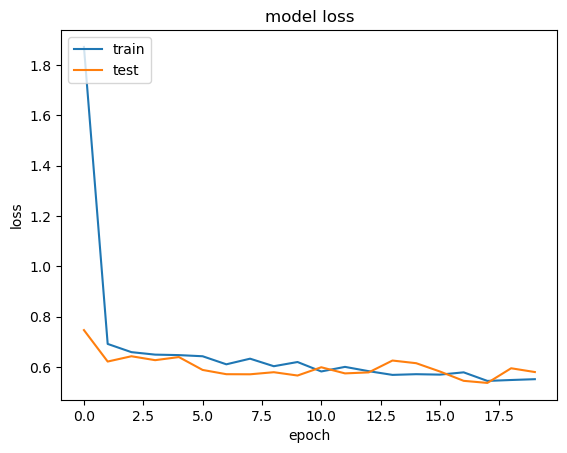

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


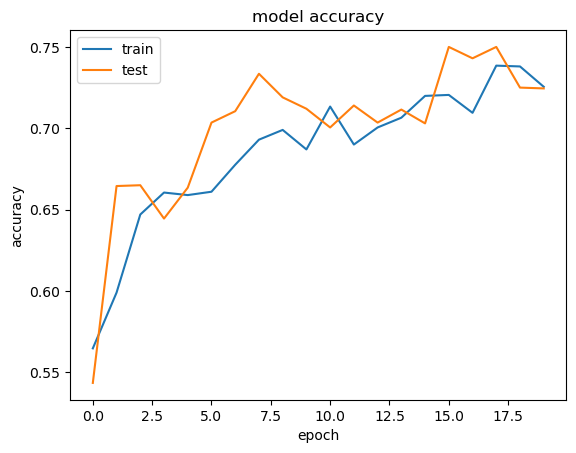

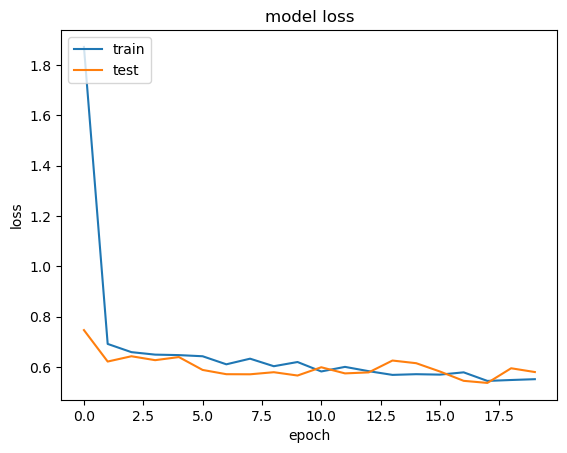

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##### Predict the image

1/1 [==============================] - 0s 40ms/step
[[1.]]
Prediction:  Dog


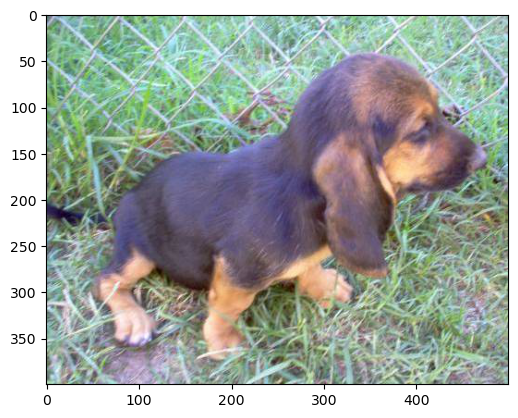

In [21]:
from tensorflow.keras.preprocessing import image
import numpy as np
img_pred = image.load_img("/Users/sharvarisoparkar/Desktop/Deep_learning_folder/Practical5/test_set/test_set/dogs/dog.4009.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/Users/sharvarisoparkar/Desktop/Deep_learning_folder/Practical5/test_set/test_set/dogs/dog.4009.jpg')
imgplot = plt.imshow(img)
plt.show()


1/1 [==============================] - 0s 24ms/step
[[0.]]
Prediction:  Cat


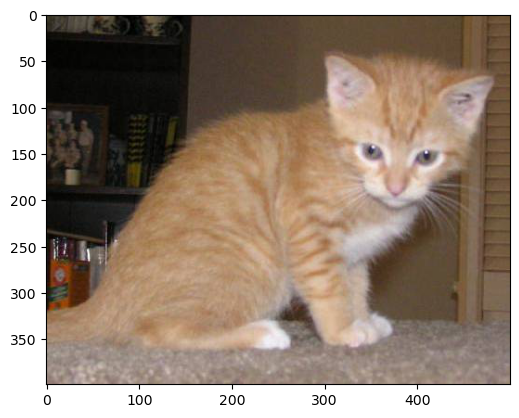

In [25]:
from tensorflow.keras.preprocessing import image
import numpy as np
img_pred = image.load_img("/Users/sharvarisoparkar/Desktop/Deep_learning_folder/Practical5/test_set/test_set/cats/cat.4003.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/Users/sharvarisoparkar/Desktop/Deep_learning_folder/Practical5/test_set/test_set/cats/cat.4003.jpg')
imgplot = plt.imshow(img)
plt.show()


#### Build the basic CNN model 1

> adding some layers to prevent ovetfitting

In [26]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience=10)
# ReduceLROnPlateau: Reduce learning rate when a metric has stopped improving
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)


callbacks = [earlystop, learning_rate_reduction]

model1 = Sequential()
model1 = Sequential()
model1.add(Conv2D(64,(3,3),input_shape=input_shape)) #64 neurons with 3*3 filter
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Flatten())
model1.add(Dense(64)) #64 neurons with 3*3 filter
model1.add(Activation('relu'))
model1.add(Dropout(0.5))#Prevents overfitting of the model and it has the effect of reducing the capacity or thinning the network during training
model1.add(Dense(1)) #output layer
model1.add(Activation('sigmoid')) #sigmoid activation function
model1.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 activation_3 (Activation)   (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 74, 74, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 350464)            0         
                                                                 
 dense_2 (Dense)             (None, 64)                22429760  
                                                                 
 activation_4 (Activation)   (None, 64)                0         
                                                      

In [27]:
model1.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 activation_3 (Activation)   (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 74, 74, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 350464)            0         
                                                                 
 dense_2 (Dense)             (None, 64)                22429760  
                                                                 
 activation_4 (Activation)   (None, 64)                0         
                                                      

In [33]:
training = model1.fit_generator(train_generator,
                   steps_per_epoch=nb_train_sample,epochs=16,
                   validation_data=validation_generator,
                       validation_steps=nb_validation_samples,callbacks=callbacks)

Epoch 1/16


/var/folders/_2/bhvs0hg507b193s64c1g1lhr0000gp/T/ipykernel_18713/4146191983.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  training = model1.fit_generator(train_generator,


100/100 [==============================] - 28s 275ms/step - loss: 0.5551 - accuracy: 0.7085 - val_loss: 0.5657 - val_accuracy: 0.7160 - lr: 0.0010
Epoch 2/16
100/100 [==============================] - 29s 288ms/step - loss: 0.5785 - accuracy: 0.7085 - val_loss: 0.5723 - val_accuracy: 0.7135 - lr: 0.0010
Epoch 3/16
100/100 [==============================] - 27s 274ms/step - loss: 0.5456 - accuracy: 0.7345 - val_loss: 0.5347 - val_accuracy: 0.7350 - lr: 0.0010
Epoch 4/16
100/100 [==============================] - 30s 300ms/step - loss: 0.5342 - accuracy: 0.7375 - val_loss: 0.5379 - val_accuracy: 0.7240 - lr: 0.0010
Epoch 5/16
100/100 [==============================] - 29s 287ms/step - loss: 0.5568 - accuracy: 0.7250 - val_loss: 0.5525 - val_accuracy: 0.7220 - lr: 0.0010
Epoch 6/16
100/100 [==============================] - 30s 300ms/step - loss: 0.5352 - accuracy: 0.7350 - val_loss: 0.5545 - val_accuracy: 0.7250 - lr: 0.0010
Epoch 7/16
100/100 [==============================] - 36s 361ms

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


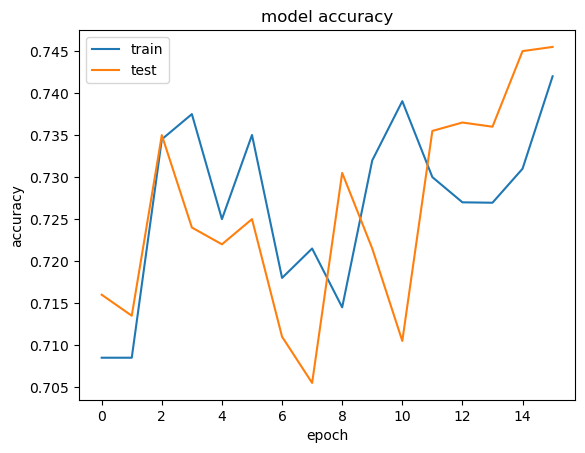

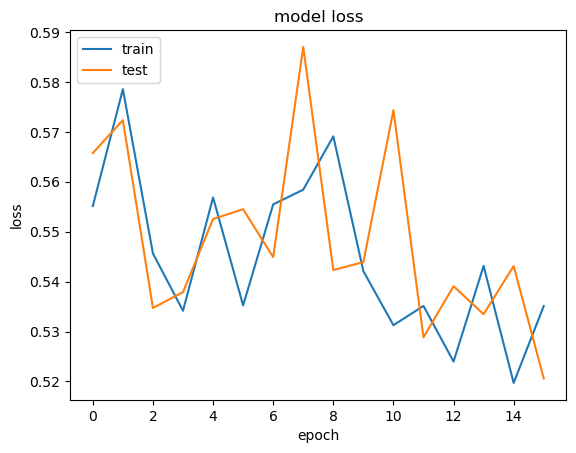

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 23ms/step
[[1.]]
Prediction:  Dog


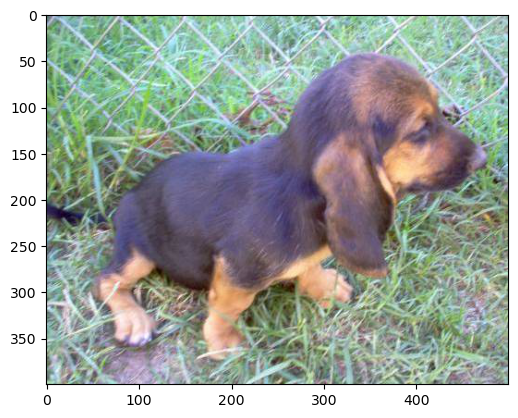

In [41]:
from tensorflow.keras.preprocessing import image
import numpy as np
img_pred = image.load_img("/Users/sharvarisoparkar/Desktop/Deep_learning_folder/Practical5/test_set/test_set/dogs/dog.4009.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model1.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/Users/sharvarisoparkar/Desktop/Deep_learning_folder/Practical5/test_set/test_set/dogs/dog.4009.jpg')
imgplot = plt.imshow(img)
plt.show()


1/1 [==============================] - 0s 23ms/step
[[0.]]
Prediction:  Cat


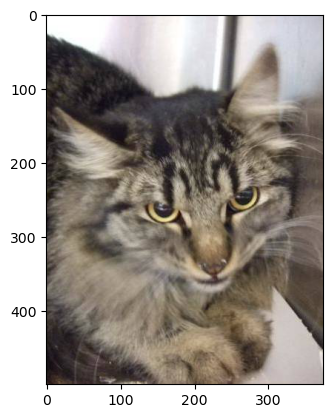

In [46]:
from tensorflow.keras.preprocessing import image
import numpy as np
img_pred = image.load_img("/Users/sharvarisoparkar/Desktop/Deep_learning_folder/Practical5/test_set/test_set/cats/cat.4099.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model1.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/Users/sharvarisoparkar/Desktop/Deep_learning_folder/Practical5/test_set/test_set/cats/cat.4099.jpg')
imgplot = plt.imshow(img)
plt.show()


### <b> Build the basic CNN model 2

In [37]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience=10)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)


callbacks = [earlystop, learning_rate_reduction]

model2 = Sequential()
model2.add(Conv2D(32,(3,3),input_shape=input_shape))
#model2.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Conv2D(128, (3, 3), activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))

model2.add(Flatten())
model2.add(Dense(512, activation='relu'))
model2.add(BatchNormalization())
model2.add(Dropout(0.5))
model2.add(Dense(1, activation='softmax')) # 2 because we have cat and dog classes




In [38]:
#model2.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 148, 148, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 74, 74, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 72, 72, 64)       

In [39]:
training = model2.fit_generator(train_generator,
                   steps_per_epoch=nb_train_sample,epochs=epochs,
                   validation_data=validation_generator,
                       validation_steps=nb_validation_samples,callbacks=callbacks)

Epoch 1/20


/var/folders/_2/bhvs0hg507b193s64c1g1lhr0000gp/T/ipykernel_18713/790050009.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  training = model2.fit_generator(train_generator,


100/100 [==============================] - 58s 563ms/step - loss: 1.1132 - accuracy: 0.5110 - val_loss: 1.0801 - val_accuracy: 0.4990 - lr: 0.0010
Epoch 2/20
100/100 [==============================] - 55s 552ms/step - loss: 0.8317 - accuracy: 0.5118 - val_loss: 1.4047 - val_accuracy: 0.5035 - lr: 0.0010
Epoch 3/20
100/100 [==============================] - 56s 556ms/step - loss: 0.7497 - accuracy: 0.5075 - val_loss: 1.1737 - val_accuracy: 0.5020 - lr: 0.0010
Epoch 4/20
100/100 [==============================] - 62s 619ms/step - loss: 0.6555 - accuracy: 0.4995 - val_loss: 0.6909 - val_accuracy: 0.5010 - lr: 0.0010
Epoch 5/20
100/100 [==============================] - 60s 596ms/step - loss: 0.6279 - accuracy: 0.5018 - val_loss: 0.7375 - val_accuracy: 0.5010 - lr: 0.0010
Epoch 6/20
100/100 [==============================] - 59s 589ms/step - loss: 0.5924 - accuracy: 0.5030 - val_loss: 0.6296 - val_accuracy: 0.4990 - lr: 0.0010
Epoch 7/20
100/100 [==============================] - 53s 524ms

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


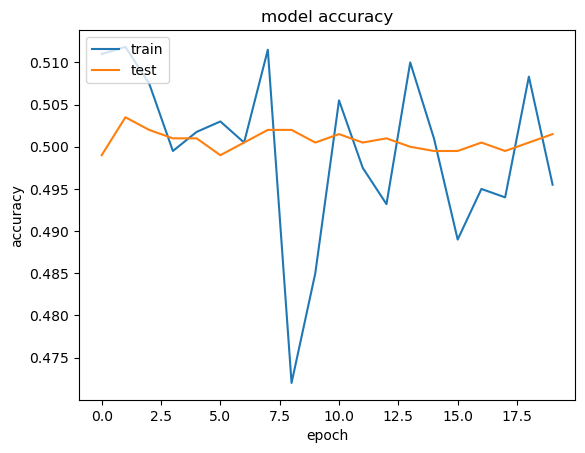

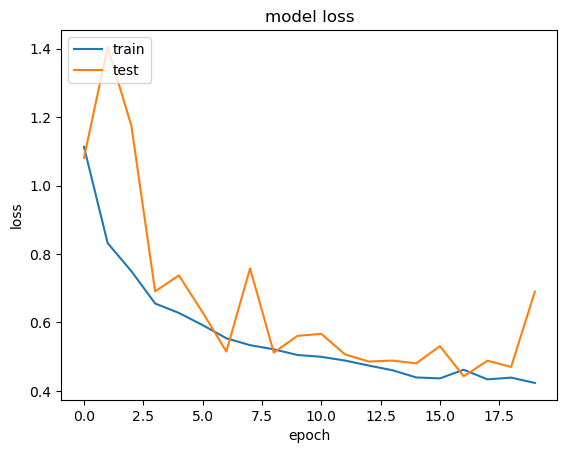

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 27ms/step
[[1.]]
Prediction:  Dog


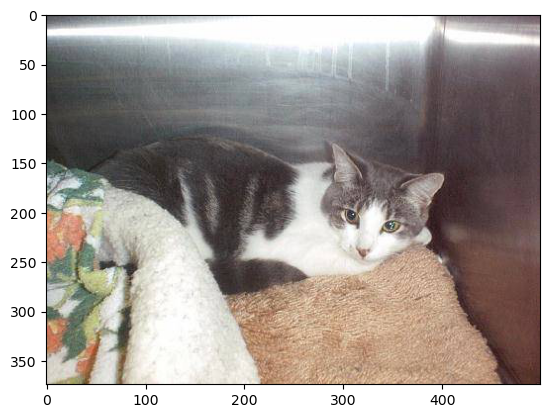

In [51]:
from tensorflow.keras.preprocessing import image
import numpy as np
img_pred = image.load_img("/Users/sharvarisoparkar/Desktop/Deep_learning_folder/Practical5/test_set/test_set/cats/cat.4799.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model2.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/Users/sharvarisoparkar/Desktop/Deep_learning_folder/Practical5/test_set/test_set/cats/cat.4799.jpg')
imgplot = plt.imshow(img)
plt.show()


1/1 [==============================] - 0s 29ms/step
[[1.]]
Prediction:  Dog


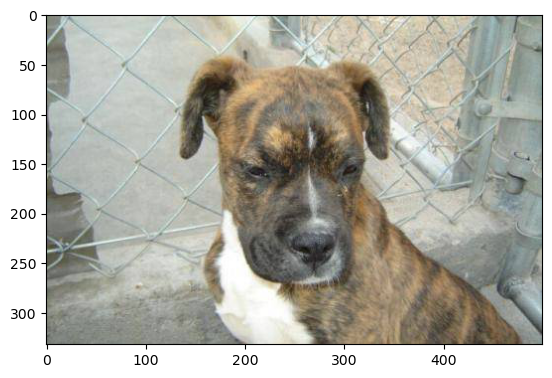

In [50]:
from tensorflow.keras.preprocessing import image
import numpy as np
img_pred = image.load_img("/Users/sharvarisoparkar/Desktop/Deep_learning_folder/Practical5/test_set/test_set/dogs/dog.4099.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model2.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/Users/sharvarisoparkar/Desktop/Deep_learning_folder/Practical5/test_set/test_set/dogs/dog.4099.jpg')
imgplot = plt.imshow(img)
plt.show()
